
# Normalized Cut


This example constructs a Region Adjacency Graph (RAG) and recursively performs
a Normalized Cut on it [1]_.

References
----------
.. [1] Shi, J.; Malik, J., "Normalized cuts and image segmentation",
       Pattern Analysis and Machine Intelligence,
       IEEE Transactions on, vol. 22, no. 8, pp. 888-905, August 2000.



In [1]:
from skimage import data, segmentation, color, io
from skimage.future import graph
from matplotlib import pyplot as plt
from skimage.measure import regionprops
from skimage import draw
import cv2

img = cv2.imread("E:/MTECH-IIITB/2018Aug-Dec/DIP-II/MalikSeg_paper/code/BSR/BSDS500/data/images/train/198004.jpg", cv2.IMREAD_GRAYSCALE)
#img = cv2.resize(img, dsize=(128, 192), interpolation=cv2.INTER_CUBIC)
#img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')

g = graph.rag_mean_color(img, labels1, mode='similarity')

#for n,d in g.nodes_iter(data=True):
 #   print(d)


C:\Program Files\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
C:\Program Files\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
C:\Program Files\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `ar

In [2]:
%matplotlib inline

In [19]:
def display_edges(image, g):
    """Draw edges of a RAG on its image
 
    Returns a modified image with the edges drawn. Edges with high weight are
    drawn in red and edges with a low weight are drawn in green. Nodes are drawn
    in yellow.
 
    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.
 
    Returns:
    out: ndarray
        Image with the edges drawn.
    """
 
    image = image.copy()
    max_weight = max([d['weight'] for x, y, d in g.edges_iter(data=True)])
    min_weight = min([d['weight'] for x, y, d in g.edges_iter(data=True)])
 
    for edge in g.edges_iter():
        n1, n2 = edge
 
        r1, c1 = map(int, g.node[n1]['centroid'])
        r2, c2 = map(int, g.node[n2]['centroid'])
 
        green = 0,1,0
        red = 1,0,0
 
        line  = draw.line(r1, c1, r2, c2)
        circle = draw.circle(r1,c1,2)
        norm_weight = ( g[n1][n2]['weight'] - min_weight ) / ( max_weight - min_weight )
 
        image[line] = 0,0,1
        image[circle] = 1,1,0
 
    return image

In [4]:
labels1 = labels1+1
regions = regionprops(labels1)
g = graph.rag_mean_color(img, labels1, mode='similarity')

In [9]:
for region in regions:
    g.node[region['label']]['centroid'] = region['centroid']

In [14]:
def show_img(img):
 
    width = img.shape[1]/75.0
    height = img.shape[0]*width/img.shape[1]
    f = plt.figure(figsize=(width, height))
    plt.imshow(img)

ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (21,)

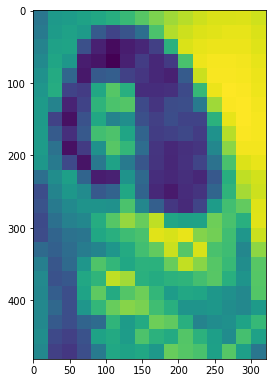

In [20]:
label_rgb = color.label2rgb(labels1, img, kind='avg')
show_img(label_rgb)
label_rgb = display_edges(label_rgb, g)
show_img(label_rgb)

In [22]:
print(g[383][382]['weight'])
print(g[382][383]['weight'])
d = list(g.nodes_iter(data=True))
g.add_node(1,mylabel=1)
g.node[1]['labels'][0]

6.182885426849362e-07
6.182885426849362e-07


KeyError: 'labels'

In [21]:
print(g.node[1]['labels'][0])
print(g.node[100]['labels'][0])
print(g.node[300]['labels'][0])

1
100
300


In [2]:

labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))


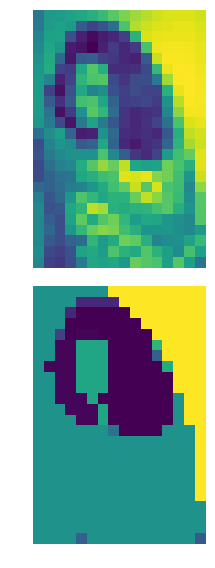

In [3]:
ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

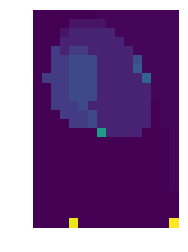

In [6]:
ncut_img = labels2
plt.axis('off')
plt.imshow(ncut_img)
plt.show()

In [7]:
from skimage.future.graph import rag
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

In [24]:
def display(g, title):
    """Displays a graph with the given title."""
    pos = nx.circular_layout(g)
    plt.figure()
    plt.title(title)
    nx.draw(g, pos)
    nx.draw_networkx_edge_labels(g, pos, font_size=20)
display(g, "Original Graph")

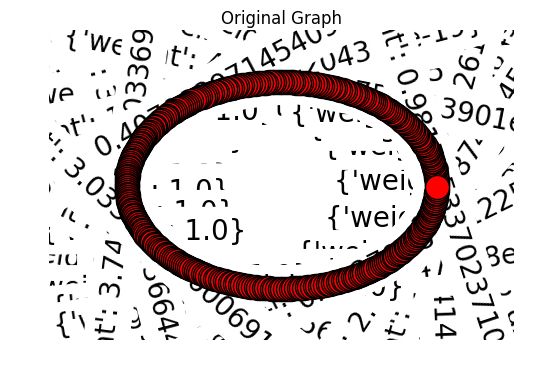

In [25]:
plt.show()

In [12]:
print(labels2[100:102,:])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 68 68 68 68 68 68 68 68
  68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68
  68 68 68 68 68 68 68 68 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84
  84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84
  84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 84 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91
   7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
   7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
   7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
   7  7  7  7  7  7  7  7  7]
 [ 0  0 

In [28]:
print(g[200])

{216: {'weight': 3.955432208277493e-05}, 201: {'weight': 8.493350616973687e-10}, 184: {'weight': 0.818977372652698}, 185: {'weight': 8.590520198942651e-09}, 217: {'weight': 0.8773496249703655}, 199: {'weight': 8.180236692074843e-18}, 183: {'weight': 6.39172380922674e-09}, 215: {'weight': 2.670200461772163e-35}}


In [34]:
for i in range(3,-3,-1):
    print(i)

3
2
1
0
-1
-2
